# Programming for Data Analysis Project 2019


## Alcohol consumption in litres per year, among males in Ireland

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Variables used:
- Alcohol intake among males in units per week
- Age 14-?
- IQ
- Income

## 1. Variables involved and first attempt at dataset

### Alcohol consumption in litres per year, among males in Ireland

Irish people on average drink 13.19 litres or pure alcohol per year. https://www.thejournal.ie/alcohol-study-4622415-May2019/ (GOED WEERGEVEN).
Men, on average, drink twice as much alcohol as women https://vinepair.com/wine-blog/world-map-men-vs-women-drink-alcohol/.
So the mean consumption of males in Ireland is 17.58 litre of pure alcohol per year.

It took me while to find the best distribution for alcohol consumption. The normal distribution does not fit, as no consumption has the highest prevalence and negative alcohol consumption is not possible. After investigation, I found that the gamma distribution fits alcohol consumption the best. This article helped me figure this out: https://www.researchgate.net/publication/223971732_Determining_the_best_population-level_alcohol_consumption_model_and_its_impact_on_estimates_of_alcohol-attributable_harms


In [40]:
mac = np.random.gamma(0.6, 29.3, 1000) # 0.6 is the shape, 29.3 (the mean should be close to 0.6 * 29.3), and 1000 variables.

I used 0.6 for scale because it matched the closest the real-life data I found. For instance, 9 percent of Irish males abstain completely, and another 8 percent drink very little, so the percentage for 0 and values close to 0 on the x-axis had to be represented correctly. On a side note, even teetotallers ingest small amounts of alcohol from ripe fruit, or perhaps chocolates containing a small bit of alcohol. This explains the values close to 0, but not quite 0.

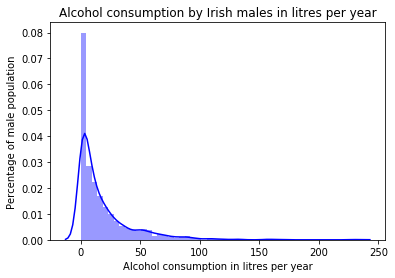

In [41]:
sns.distplot(mac, color = "b") # distplot is used to take a quick look at the distribution
plt.xlabel("Alcohol consumption in litres per year")
plt.ylabel("Percentage of male population")
plt.title("Alcohol consumption by Irish males in litres per year");

If we look at the mean value below, we can see it is indeed close to the mean consumption of alcohol of 17.58 litres per year.
The median could also give us some information, as some heavy alcoholics could potentially skew the mean.

In [43]:
np.mean(mac)

18.289503324333527

In [42]:
np.median(mac)

9.20579464328123

Now that I know which distribution to use, I can start creating the first variable for my synthesized dataset

In [69]:
mac = np.random.gamma(0.6, 29.3, 1000)

In [71]:
df = pd.DataFrame(mac, columns = ["Alcohol consumption"])

In [72]:
df

,Alcohol consumption
0,0.141758
1,32.859958
2,51.953643
3,17.659204
4,5.913536
5,2.810886
6,1.451442
7,0.481334
8,9.614725
9,24.108440


### Age

I found that the mean age for men in Ireland is 36.7 years. I also found data for male population structure by age group. The distribution of age does not fit one of the conventional distributions.
So, after long delibiration, I have decided to use the multinomial distribution. The probabilities per age group are based on the data here: https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/

In [111]:
cat24 = 0.165
cat44 = 0.36
cat64 = 0.305
cat65 = 0.17

mage = np.random.multinomial(1000, [cat24, cat44, cat64, cat65])

In [118]:
mage

array(['25-44', '45-64', '25-44', '45-64', '15-24', '45-64', '45-64',
       '65+', '25-44', '25-44', '25-44', '45-64', '45-64', '65+', '65+',
       '25-44', '45-64', '25-44', '15-24', '65+', '45-64', '65+', '15-24',
       '45-64', '45-64', '15-24', '45-64', '25-44', '15-24', '25-44',
       '65+', '25-44', '65+', '25-44', '65+', '45-64', '65+', '15-24',
       '25-44', '25-44', '65+', '45-64', '15-24', '15-24', '25-44',
       '15-24', '15-24', '45-64', '45-64', '25-44', '45-64', '25-44',
       '15-24', '45-64', '25-44', '65+', '15-24', '45-64', '25-44',
       '45-64', '25-44', '25-44', '65+', '65+', '65+', '65+', '25-44',
       '65+', '45-64', '15-24', '65+', '15-24', '25-44', '25-44', '15-24',
       '45-64', '45-64', '25-44', '15-24', '65+', '15-24', '65+', '15-24',
       '45-64', '15-24', '15-24', '25-44', '25-44', '45-64', '15-24',
       '45-64', '25-44', '45-64', '45-64', '25-44', '25-44', '25-44',
       '25-44', '45-64', '25-44', '65+', '25-44', '45-64', '25-44',
      

With numpy.random.choice we can now generate values for the different age groups.

In [115]:
age = ["15-24", "25-44", "45-64", "65+"]
mage = np.random.choice(age, 1000, p=[cat24, cat44, cat64, cat65])

In [116]:
df = pd.DataFrame(mage, columns = ["Age group"])

In [119]:
df

,Age group
0,25-44
1,45-64
2,25-44
3,45-64
4,15-24
5,45-64
6,45-64
7,65+
8,25-44
9,25-44


### IQ

After investigation, I found that the average IQ in Ireland is 92. http://worldpopulationreview.com/countries/average-iq-by-country/
There is a lot of debate about which of the sexes has the highest IQ, but most research shows little to no difference. Therefore I am going to take 92 as the mean IQ of males in Ireland.
IQ is normally distributed. And I found that the standard deviation in developed countries is close to 12 https://infoproc.blogspot.com/2010/11/standard-deviations-around-world.html